In [2]:
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as pl
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import urllib2
import json
import os

s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
nod=pd.read_csv('NODESLatLon.csv',index_col=1)
path= pd.read_csv("/Users/nikhilkishore/Dropbox/nyuclasses/Applied DataScience/network project/paths.csv")

In [5]:
nod.columns=(['nodenum','lat','lon'])

In [6]:
path.columns

Index([u'Unnamed: 0', u'train', u'source', u'dest', u'dist'], dtype='object')

In [7]:
path['source'] = map(lambda x: x.replace(' ',''), path['source'])
path['dest'] = map(lambda x: x.replace(' ',''), path['dest'])
#nod['nodes'] = map(lambda x: x.replace(' ',''), nod['nodes'])


In [8]:
Flights=nx.Graph()
Flights.add_nodes_from(nod.index)
#create a dictionary of city locations
CityPos={}
for c in nod.index:
    CityPos[c]=(nod['lon'][c],nod['lat'][c])


In [9]:
en=len(path.index)
print en
edgelist=[0]*en
for k in range(0,en):
    edgelist[k]= (path['source'][k],path['dest'][k])
Flights.add_edges_from(edgelist)

2187


In [10]:
len(edgelist)

2187

In [11]:
len(CityPos)
#type(CityPos.values()[0][1])

352

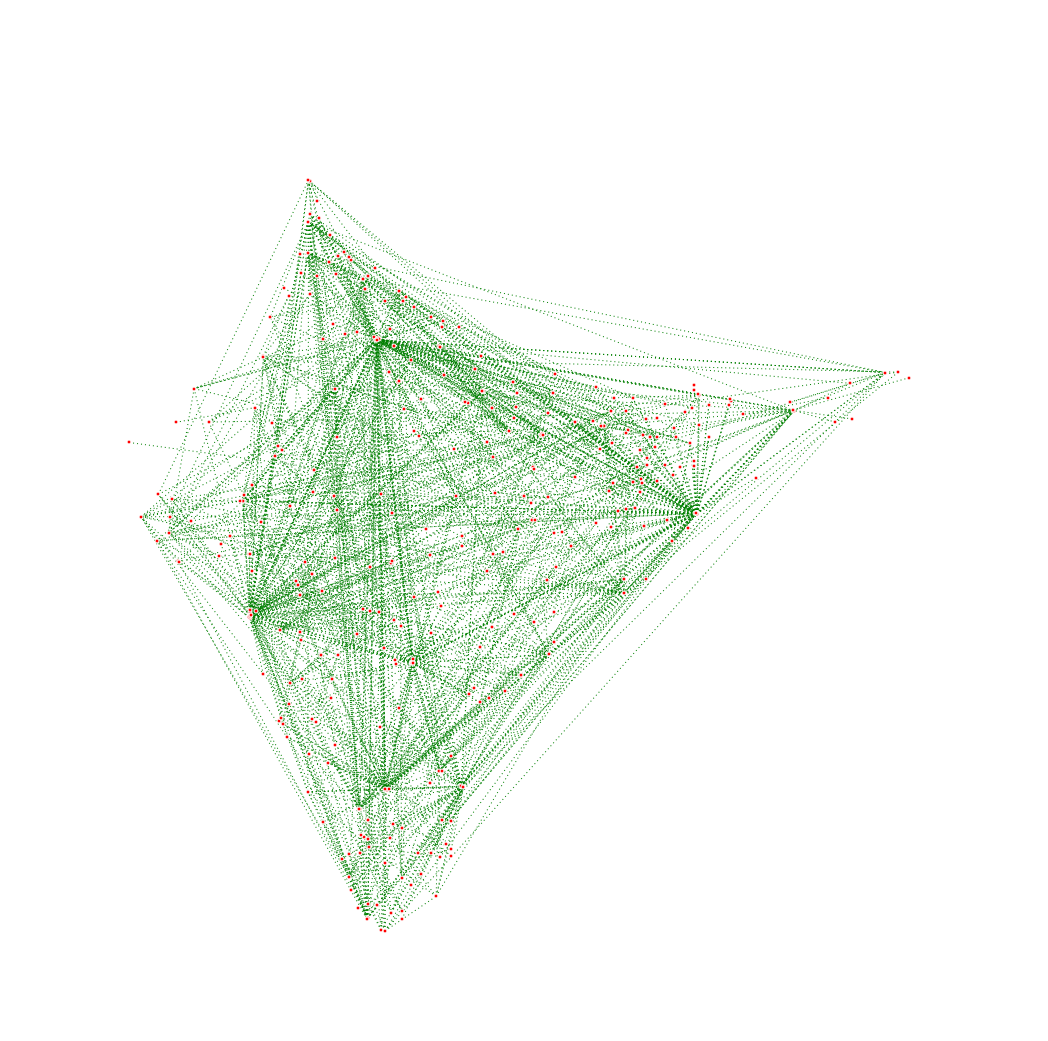

In [12]:
plt.figure(figsize = (14,14))
k = 0
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=15,edge_color='green',style='dotted')

In [13]:
Flights1=nx.Graph()
Flights1.add_nodes_from(nod.index)
#create a dictionary of city locations

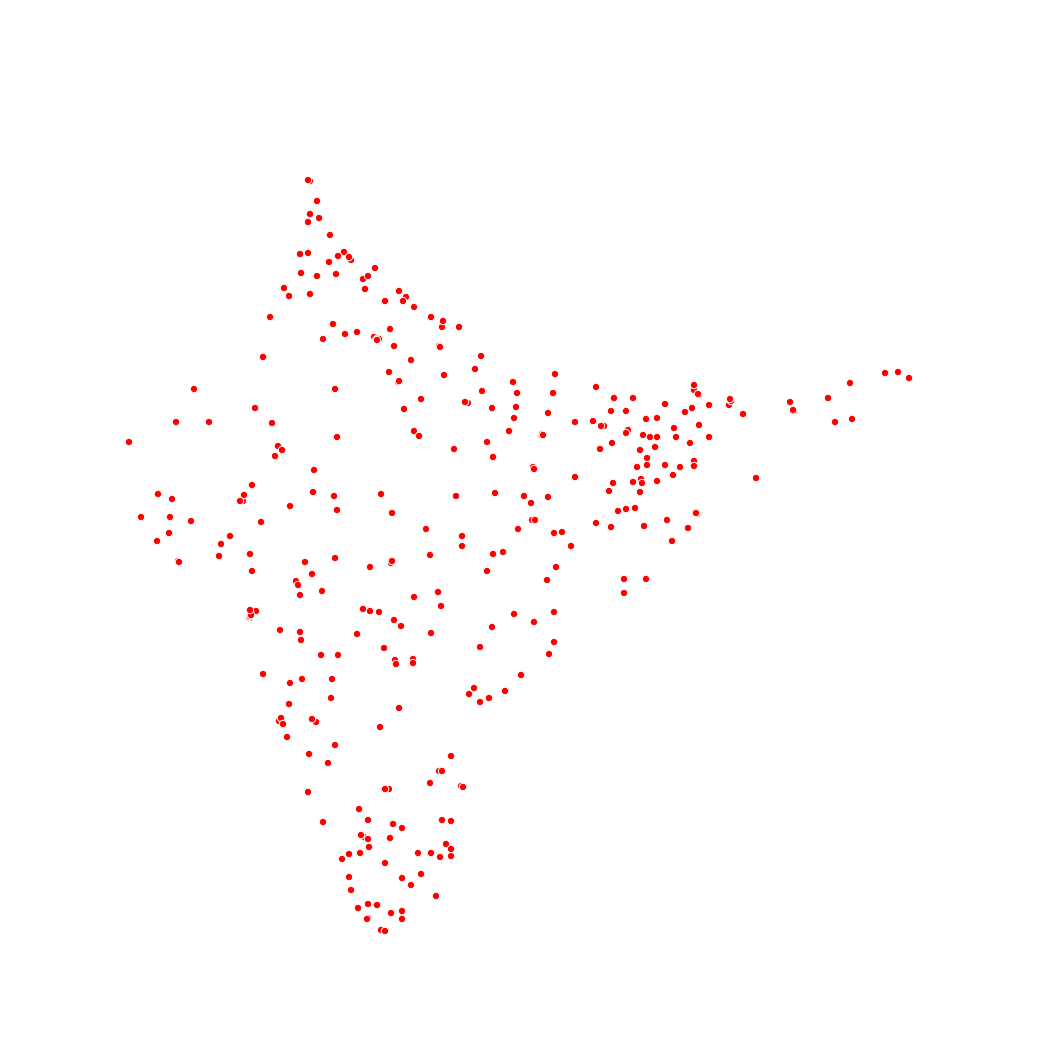

In [14]:
plt.figure(figsize = (14,14))
k = 0
nx.draw(Flights1,pos=CityPos,with_labels=False,arrows=False,node_size=55)

In [15]:
nx.degree(Flights)

{'ABOHAR': 2,
 'ADILABAD': 1,
 'ADRSHNGRDELHI': 1,
 'AGRACANTT': 3,
 'AGRAFORT': 4,
 'AHMEDABADJN': 32,
 'AHMEDABADMG': 1,
 'AISHBAGH': 2,
 'AJMERJN': 27,
 'AJNI': 1,
 'AKOLAJN': 3,
 'ALIPURDUARJN': 3,
 'ALLAHABADCITY': 1,
 'ALLAHABADJN': 11,
 'ALLEPPEY': 3,
 'AMBALACANTJN': 3,
 'AMBANDAURA': 1,
 'AMBIKAPUR': 3,
 'AMRAVATI': 5,
 'AMRITSARJN': 24,
 'ANANDVIHARTRM': 23,
 'ASANSOLJN': 7,
 'ATARI': 1,
 'AURANGABAD': 3,
 'AZAMGARH': 3,
 'AZIMGANJJN': 1,
 'BAGALKOT': 1,
 'BALAGHATJN': 1,
 'BALANGIR': 1,
 'BALHARSHAH': 2,
 'BALLIA': 1,
 'BALURGHAT': 3,
 'BANDRATERMINUS': 28,
 'BANGALORECANT': 3,
 'BANGALORECYJN': 26,
 'BANGRIPOSI': 1,
 'BANIHAL': 1,
 'BANKA': 1,
 'BARABIL': 3,
 'BARAMATI': 1,
 'BARAUNIJN': 5,
 'BAREILLY': 9,
 'BARKAKANA': 2,
 'BARMER': 5,
 'BARWADIHJN': 1,
 'BHAGALPUR': 10,
 'BHAGATKIKOTHI': 9,
 'BHATINDAJN': 5,
 'BHAVNAGARTRMUS': 7,
 'BHIND': 2,
 'BHIWANI': 1,
 'BHOJUDIHJN': 1,
 'BHOPALJN': 11,
 'BHUBANESWAR': 21,
 'BHUJ': 5,
 'BHUSAVALJN': 5,
 'BIDAR': 2,
 'BIJAPUR': 4,
 'B